In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("sell_data.csv")
                # index_col = 'Year',
                # parse_dates=False)
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,ItemID,Quantity
0,2014-11-11,515025,14
1,2014-11-11,512210,73
2,2014-11-11,512340,44
3,2014-11-11,HA590140,1
4,2014-11-11,541004,125
...,...,...,...
164656,2024-06-17,515175,2
164657,2024-06-17,512332,2
164658,2024-06-17,512665,2
164659,2024-06-17,515159,1


In [2]:
input_id = ["512217"]  ## change to check for different hub

itemID = input_id #input the item id you want to search
mask = df['ItemID'].isin(itemID)
filtered_item = df[mask]
filtered_item

,Date,ItemID,Quantity
8332,2015-11-14,512217,15
8333,2015-11-14,512217,15
8334,2015-11-14,512217,15
8335,2015-11-14,512217,15
8336,2015-11-14,512217,15
...,...,...,...
149182,2023-12-06,512217,8
149183,2023-12-06,512217,8
149184,2023-12-06,512217,22
150665,2023-12-19,512217,2


In [3]:
result = filtered_item.groupby(filtered_item.Date.dt.year)['Quantity'].sum()
result = pd.DataFrame({'Year':result.index, 'Qty':result.values})

### increase the value to get on the same graph with market qty
result = result.reset_index()  # make sure indexes pair with number of rows
original_sale_data = result.copy() # make a copy of the original data

# for i in range(len(result)):
#     result.loc[i, 'Qty'] = result.loc[i, 'Qty'] * 100 ## increase the value by 100 times
result

,index,Year,Qty
0,0,2015,136
1,1,2016,113
2,2,2017,26
3,3,2018,170
4,4,2019,360
5,5,2020,100
6,6,2021,304
7,7,2022,392
8,8,2023,443
9,9,2024,50


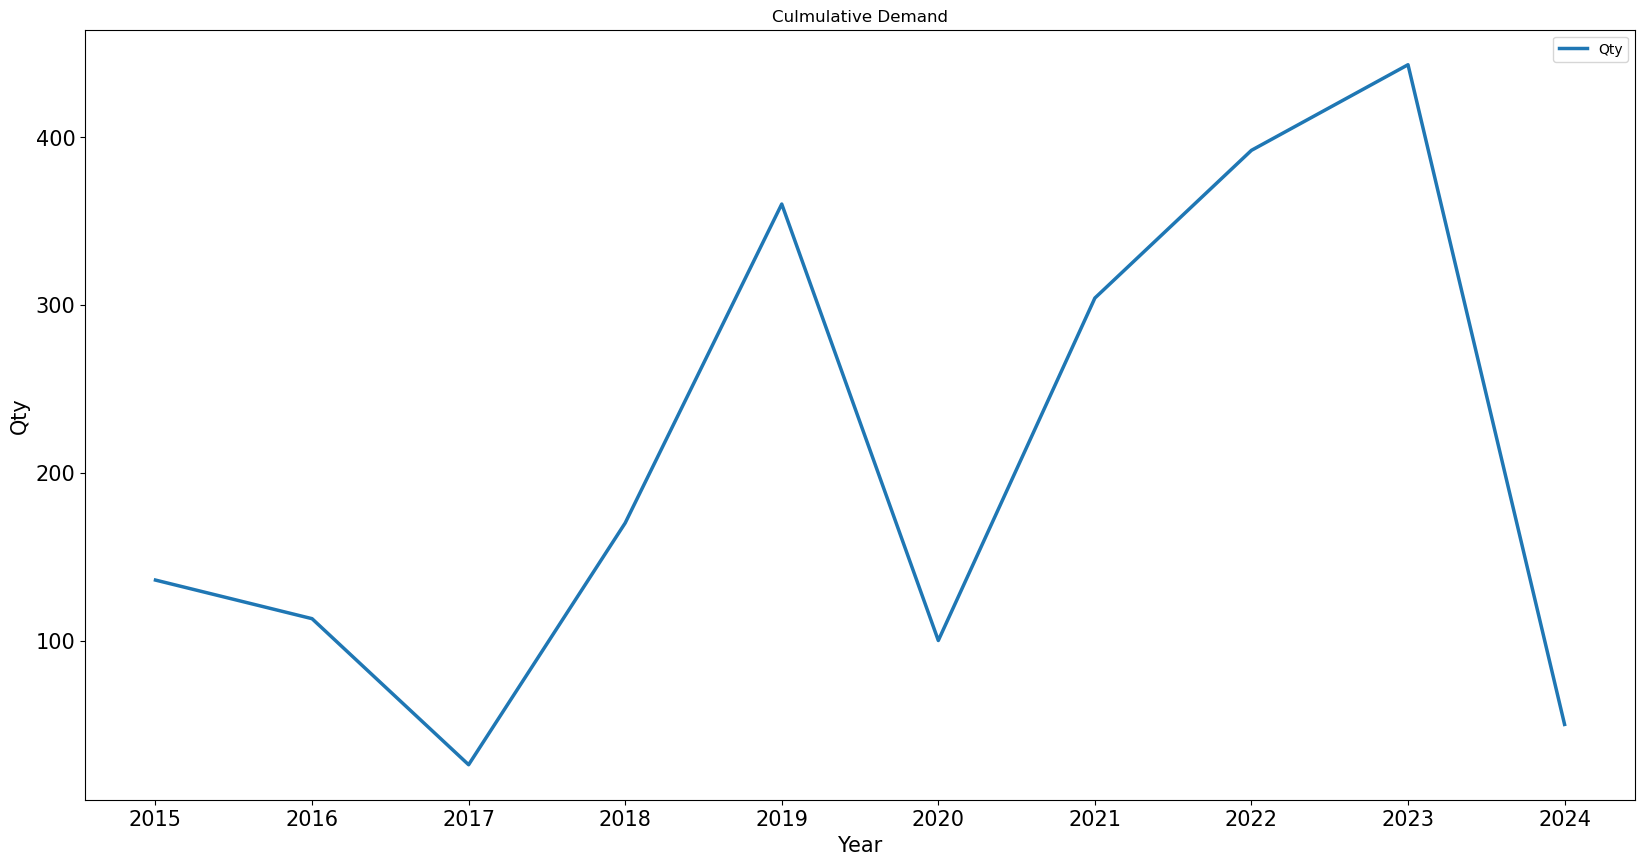

,index,Year,Qty
0,0,2015,136
1,1,2016,113
2,2,2017,26
3,3,2018,170
4,4,2019,360
5,5,2020,100
6,6,2021,304
7,7,2022,392
8,8,2023,443
9,9,2024,50


In [4]:
# plot the data
#result.plot(x="Year", y="Qty", kind="line") 
result['Qty'].plot(legend = True, label = 'Qty', title = \
      "Culmulative Demand", style = '-', linewidth = 2.5, fontsize=15,figsize=(20, 10))
# naming the x and y axis
plt.xlabel('Year', fontsize=15)
plt.ylabel('Qty', fontsize=15)
plt.xticks(result.index,result["Year"].values)
# plotting a line plot after changing it's width and height

plt.show()
result

2009 is out! 
2010 is out! 
2011 is out! 
2012 is out! 
2013 is out! 
2014 is out! 
   Year      Qty
0  2015  2723127
1  2016  2586971
2  2017  2457622
3  2018  2334741
4  2019  2218004
5  2020  1523969
6  2021   813624
7  2022   171585


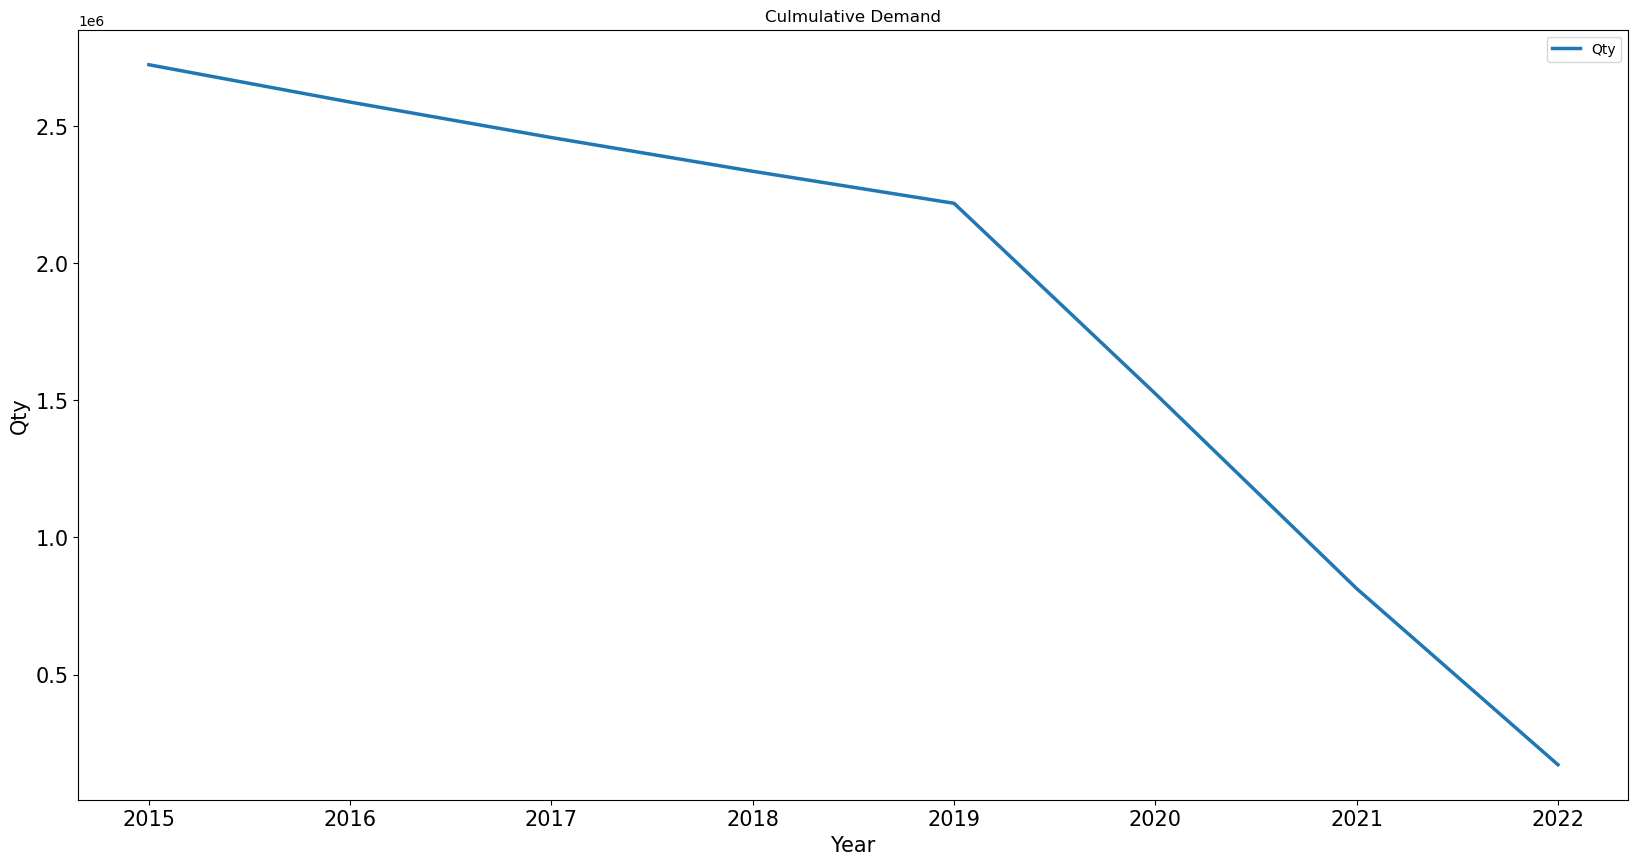

In [5]:
df = pd.read_csv("data.csv")
                # index_col = 'Year',
                # parse_dates=False)
itemID = input_id #input the item id you want to search
mask = df['ItemID'].isin(itemID)
filtered_item = df[mask]
yearly_total = {}
for index, row in filtered_item.iterrows(): # nice method to use
    year = row['Year']
    quantity = row['Quantity']
    if year not in yearly_total:
        yearly_total[year] = quantity
    else:
        yearly_total[year] += quantity
years = list(yearly_total.keys())
# creating the prediction of all total demand in the after-market (2010 -> 2027)
scrappage_rate = 0.05
after_market = {}
for current_year in range(years[0]+3,years[len(years)-1]+14,1):
    # check year that are in the after-market
    start_year = current_year -13
    end_year = current_year -3
    if(start_year < years[0]):
        start_year = years[0]
    year_included = years[start_year -years[0]:end_year-years[0]+1]
    #print(current_year,": ", year_included)
    #### calculate total up to current year###
    total = 0
    for year in year_included:
        total += yearly_total[year] *0.95**(current_year-(year+3)+1) ## 0.95 should be multiply extra n times for extra n years after 2010, 2010 is 1 time
        #print(year, ": " + str(current_year-(year+3)+1) + "times")
    after_market[current_year] = int(total)
    #print("**")
    #print(current_year, total)
# turn the dictionary into a df
result2 = pd.DataFrame(after_market.items(), columns=['Year', 'Qty'])

# remove the row prior to the start year of result(sale data)
start_year = result.iloc[0]['Year']
remove_year = []
for i, row in result2.iterrows():
    if (result2.iloc[i]['Year'] < start_year):
        print(result2.iloc[i]['Year'], "is out! ")
        remove_year.append(i)
result2 = result2.drop(labels=remove_year, axis=0)
result2 = result2.reset_index()
result2 = result2.drop(labels="index", axis=1)
print(result2)

# plot the data
#result.plot(x="Year", y="Qty", kind="line") 
result2['Qty'].plot(legend = True, label = 'Qty', title = \
      "Culmulative Demand", style = '-', linewidth = 2.5, fontsize=15,figsize=(20, 10))
# naming the x and y axis
plt.xlabel('Year', fontsize=15)
plt.ylabel('Qty', fontsize=15)
plt.xticks(result2.index,result2["Year"].values)
# plotting a line plot after changing it's width and height

plt.show()

In [6]:
# use to calculate the third line, which is the percentage between two of the line
end_year = 0
if result2.iloc[len(result2)-1]['Year'] > result.iloc[len(result)-1]['Year']:
    end_year = result.iloc[len(result)-1]['Year']
else:
    end_year = result2.iloc[len(result2)-1]['Year']

valid_year_index = result.index[result['Year'] <= end_year].tolist()
valid_years = result.iloc[:len(valid_year_index)]['Year']

rates = []
for i in (valid_year_index):
    sale = original_sale_data.iloc[i]['Qty']
    market = result2.iloc[i]['Qty']
    print(original_sale_data.iloc[i]['Year'], " sale: ", original_sale_data.iloc[i]['Qty'], " market: ", result2.iloc[i]['Qty'])
    rates.append(sale/market)
rates
d = {'Year':valid_years, 'Qty':rates}
rates_table = pd.DataFrame(data=d)
rates_table

original_rates = rates_table.copy() #copy the original untouched rates

# for i in range(len(rates_table)):
#     sale = original_sale_data.iloc[i]['Qty'] 
#     market = result2.iloc[i]['Qty']
#     adjust_rate = (sale + market)/2
#     rates_table.loc[i, 'Qty'] = rates_table.loc[i, 'Qty'] * adjust_rate*100 ## increase the value by 100 times
rates_table

2015  sale:  136  market:  2723127
2016  sale:  113  market:  2586971
2017  sale:  26  market:  2457622
2018  sale:  170  market:  2334741
2019  sale:  360  market:  2218004
2020  sale:  100  market:  1523969
2021  sale:  304  market:  813624
2022  sale:  392  market:  171585


,Year,Qty
0,2015,0.000050
1,2016,0.000044
2,2017,0.000011
3,2018,0.000073
4,2019,0.000162
5,2020,0.000066
6,2021,0.000374
7,2022,0.002285


In [7]:
import math
import statistics
# adjust all three of the table to make them appear on a scale 1-10
m_t = 0
s_t = 0
r_t = 0

for i in range(len(result2)):
    m_t += (result2.iloc[i]['Qty'])
for i in range(len(result)):
    s_t += (result.iloc[i]['Qty'])
for i in range(len(rates_table)):
    r_t += (rates_table.iloc[i]['Qty'])

# market_median = statistics.median(m_t)
# sale_median = statistics.median(s_t)
# rate_median = statistics.median(r_t)
# print(market_median,sale_median,rate_median)

market_avg = m_t / len(result2)
sale_avg = s_t / len(result)
rate_avg = r_t / len(rates_table)
print(market_median,sale_median,rate_median)

# Calculate number of digits after first digit
market_d = math.floor(math.log10(market_median)) 
sale_d = math.floor(math.log10(sale_median)) 
rate_d = math.floor(math.log10(rate_median))

digit_list = [market_d, sale_d, rate_d]
max_digit = max(market_d, sale_d, rate_d)

print(digit_list)
table_list = [result2,result,rates_table]

print(table_list)

# iterrate through digit_list to see which table need adjustment
adjustment_list =[]
for i in range(len(digit_list)):
    digit = digit_list[i]
    if i==0:
        if digit < max_digit:
            adjustment_list.append("market")
            
    if i==1:
        if digit < max_digit:
            adjustment_list.append("sale")
    if i==2:
        if digit < max_digit:
            adjustment_list.append("rate")
        


print(adjustment_list)

if "market" in adjustment_list:
    for i in range(len(result2)):
        result2.loc[i, 'Qty'] = result2.loc[i, 'Qty'] * 10**(max_digit - market_d)
if "sale" in adjustment_list:
    for i in range(len(result)):
        result.loc[i, 'Qty'] = result.loc[i, 'Qty'] * 10**(max_digit - sale_d)
if "rate" in adjustment_list:
    for i in range(len(rates_table)):
        rates_table.loc[i, 'Qty'] = rates_table.loc[i, 'Qty'] * 10**(max_digit - rate_d)   

rates_table

2276372.5 153.0 6.921567416830695e-05
[6, 2, -5]
[   Year      Qty
0  2015  2723127
1  2016  2586971
2  2017  2457622
3  2018  2334741
4  2019  2218004
5  2020  1523969
6  2021   813624
7  2022   171585,    index  Year  Qty
0      0  2015  136
1      1  2016  113
2      2  2017   26
3      3  2018  170
4      4  2019  360
5      5  2020  100
6      6  2021  304
7      7  2022  392
8      8  2023  443
9      9  2024   50,    Year       Qty
0  2015  0.000050
1  2016  0.000044
2  2017  0.000011
3  2018  0.000073
4  2019  0.000162
5  2020  0.000066
6  2021  0.000374
7  2022  0.002285]
['sale', 'rate']


,Year,Qty
0,2015,4.994258e+06
1,2016,4.368043e+06
2,2017,1.057933e+06
3,2018,7.281322e+06
4,2019,1.623081e+07
5,2020,6.561813e+06
6,2021,3.736370e+07
7,2022,2.284582e+08


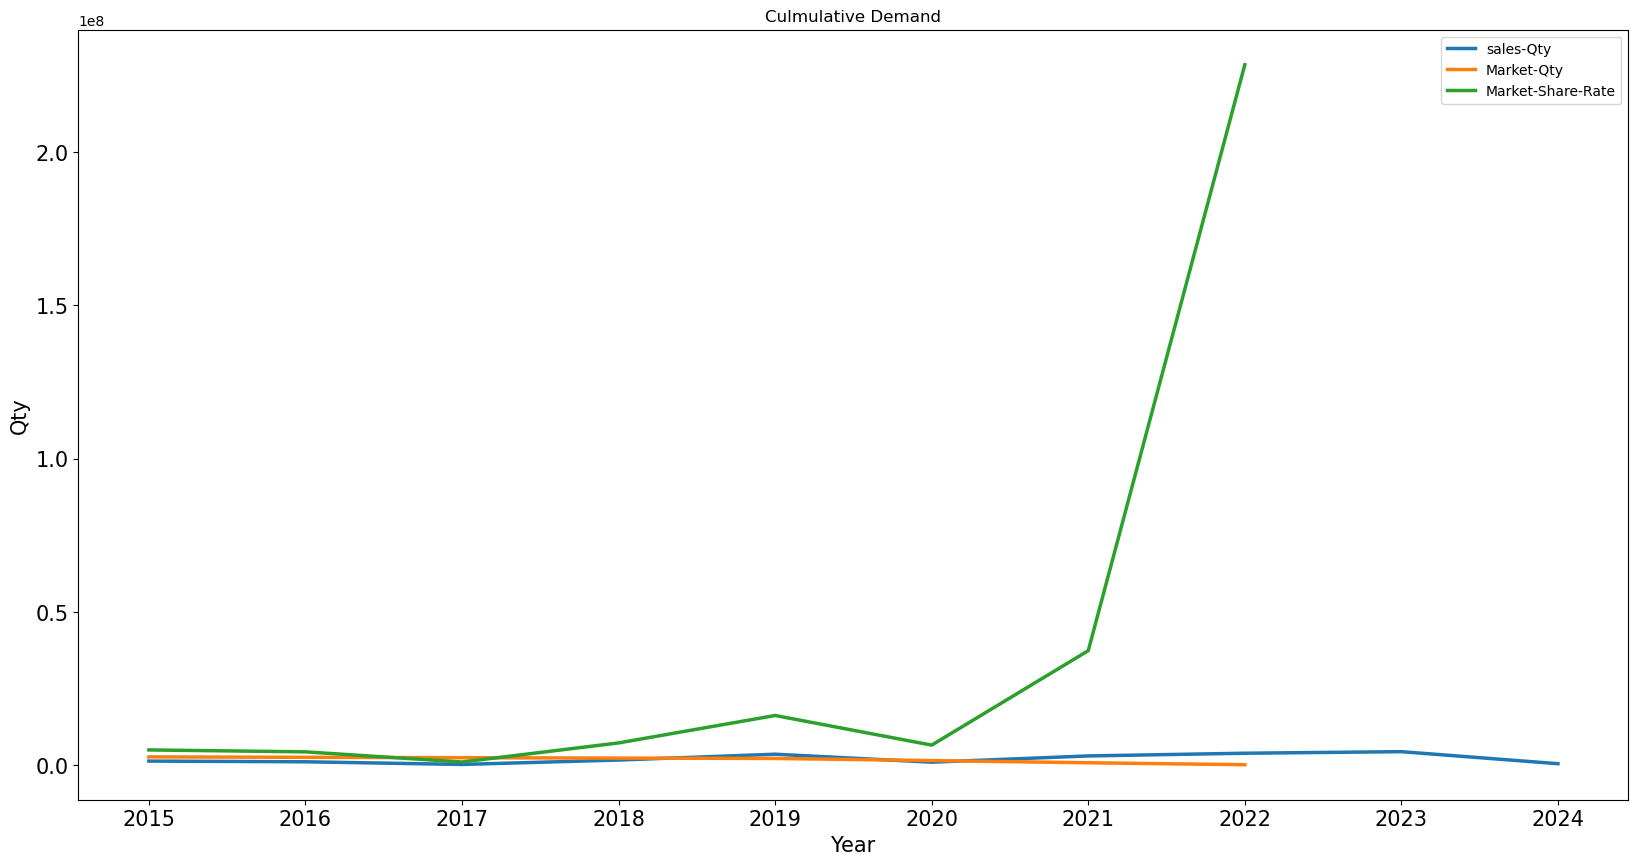

In [8]:
result['Qty'].plot(legend = True, label = 'sales-Qty', title = \
      "Culmulative Demand", style = '-', linewidth = 2.5, fontsize=15,figsize=(20, 10))
# naming the x and y axis
plt.xlabel('Year', fontsize=15)
plt.ylabel('Qty', fontsize=15)
plt.xticks(result.index,result["Year"].values)


result2['Qty'].plot(legend = True, label = 'Market-Qty', title = \
      "Culmulative Demand", style = '-', linewidth = 2.5, fontsize=15,figsize=(20, 10))
# naming the x and y axis
plt.xlabel('Year', fontsize=15)
plt.ylabel('Qty', fontsize=15)

rates_table['Qty'].plot(legend = True, label = 'Market-Share-Rate', title = \
      "Culmulative Demand", style = '-', linewidth = 2.5, fontsize=15,figsize=(20, 10))
# naming the x and y axis
plt.xlabel('Year', fontsize=15)
plt.ylabel('Qty', fontsize=15)


if result2.iloc[len(result2)-1]['Year'] > result.iloc[len(result)-1]['Year']:
    plt.xticks(result2.index,result2["Year"].values)
else:
    plt.xticks(result.index,result["Year"].values)

# plt.xlim(result2.index.min(), result2.index.max())

plt.show()

In [9]:
import math

number = 1e3  # Example number in scientific notation

# Calculate number of digits
num_digits = math.floor(math.log10(number)) 

print(f"The number of digits in {number} is {num_digits}")


The number of digits in 1000.0 is 3
